In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pynance as pn


Loading stock price data

In [14]:
file_paths = {
    'Apple': '../src/data/yfinance_data/AAPL_historical_data.csv',
    'Amazon': '../src/data/yfinance_data/AMZN_historical_data.csv',
    'Google': '../src/data/yfinance_data/GOOG_historical_data.csv',
    'Meta': '../src/data/yfinance_data/META_historical_data.csv',
    'Microsoft': '../src/data/yfinance_data/MSFT_historical_data.csv',
    'Tesla': '../src/data/yfinance_data/TSLA_historical_data.csv',
    'Nvidia': '../src/data/yfinance_data/NVDA_historical_data.csv'
}

AAPL_data = pd.read_csv(file_paths['Apple'])
AMZN_data = pd.read_csv(file_paths['Amazon'])
GOOG_data = pd.read_csv(file_paths['Google'])
META_data = pd.read_csv(file_paths['Meta'])
MSFT_data = pd.read_csv(file_paths['Microsoft'])
NVDA_data = pd.read_csv(file_paths['Nvidia'])
TSLA_data = pd.read_csv(file_paths['Tesla'])

# Add a 'Stock' column to identify each dataset
AAPL_data['Stock'] = 'AAPL'
AMZN_data['Stock'] = 'AMZN'
GOOG_data['Stock'] = 'GOOG'
META_data['Stock'] = 'META'
MSFT_data['Stock'] = 'MSFT'
NVDA_data['Stock'] = 'NVDA'
TSLA_data['Stock'] = 'TSLA'

# Merge the data into one DataFrame
merged_data = pd.concat(
    [AAPL_data, AMZN_data, GOOG_data, META_data, MSFT_data, NVDA_data, TSLA_data],
    ignore_index=True
)

# Display the merged data
print("Merged Stock Data:")
merged_data.head()

Merged Stock Data:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [26]:
import talib

# Convert 'Date' to datetime for better handling
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort by Date for each stock
merged_data.sort_values(by=['Stock', 'Date'], inplace=True)

# Calculate indicators for each stock individually
def apply_indicators(df):
    # Moving Average (50-day and 200-day)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)

    # Relative Strength Index (RSI) - 14-day
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

    # Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    return df

# Apply the function to each group (each stock)
merged_data = merged_data.groupby('Stock', group_keys=False).apply(apply_indicators)

# Display the DataFrame with indicators
merged_data.tail()


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_5684\1421310382.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data = merged_data.groupby('Stock', group_keys=False).apply(apply_indicators)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock,SMA_50,SMA_200,RSI_14,MACD,MACD_signal,MACD_hist
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA,202.1838,205.24100,44.886918,11.789291,15.873789,-4.084498
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA,203.1510,205.03960,46.951389,9.353206,14.569672,-5.216466
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA,203.9960,204.84025,46.752165,7.302106,13.116159,-5.814053
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA,205.1582,204.68265,52.664511,6.593101,11.811547,-5.218447
45427,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,TSLA,206.1138,204.48080,48.220474,5.206237,10.490485,-5.284248


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_5684\633537928.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['SMA_50'] = aapl_data['Close'].rolling(window=50).mean()
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_5684\633537928.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['SMA_200'] = aapl_data['Close'].rolling(window=200).mean()
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_5684\633537928.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of

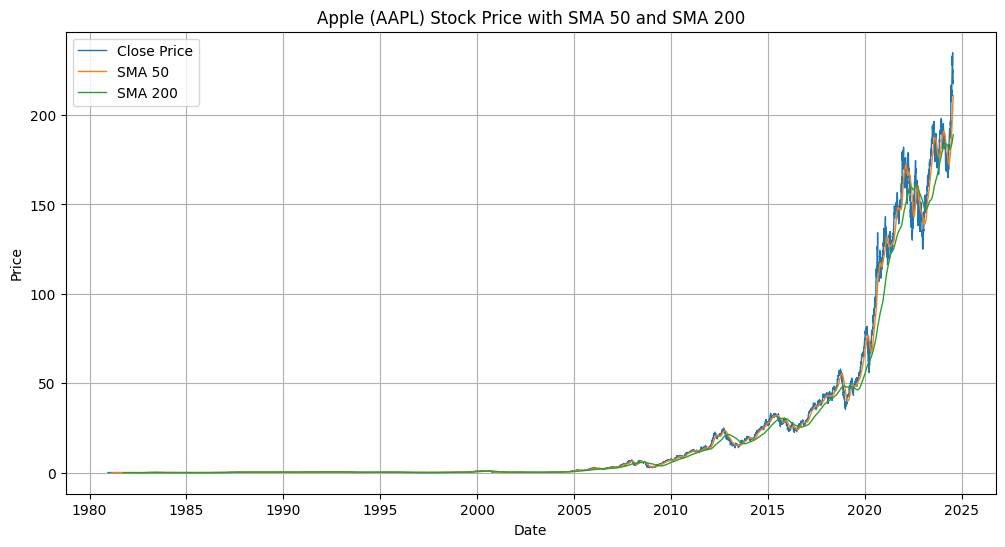

In [27]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.sort_values(by='Date', inplace=True)

# Filter data for a specific stock, e.g., Apple (AAPL)
aapl_data = merged_data[merged_data['Stock'] == 'AAPL']

# Set 'Date' as index for PyNance compatibility
aapl_data.set_index('Date', inplace=True)

# Calculate Moving Averages
aapl_data['SMA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['SMA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Calculate Daily Returns
aapl_data['Daily_Return'] = aapl_data['Close'].pct_change()

# Plot Close Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(aapl_data.index, aapl_data['Close'], label='Close Price', linewidth=1)
plt.plot(aapl_data.index, aapl_data['SMA_50'], label='SMA 50', linewidth=1)
plt.plot(aapl_data.index, aapl_data['SMA_200'], label='SMA 200', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple (AAPL) Stock Price with SMA 50 and SMA 200')
plt.legend()
plt.grid(True)
plt.show()

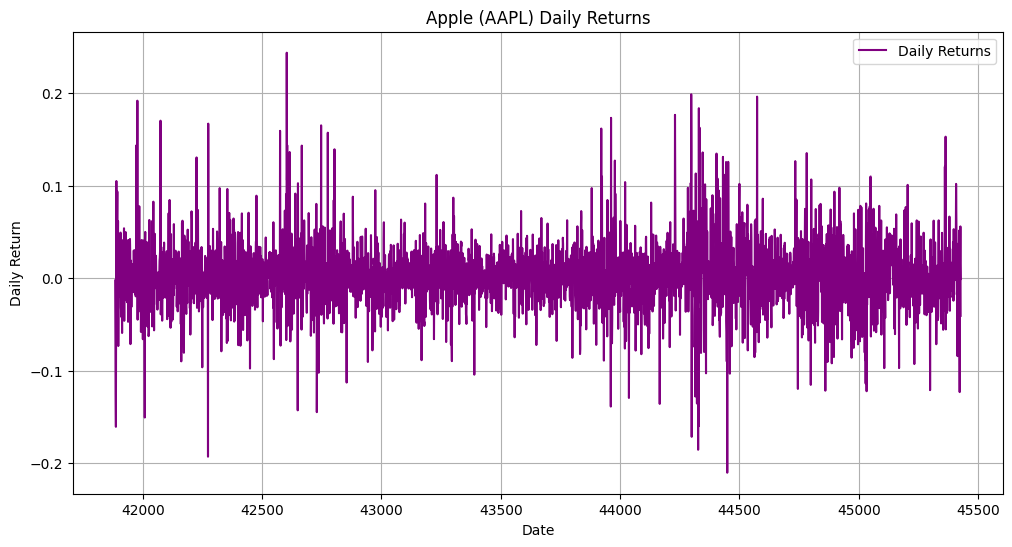

In [29]:
daily_returns = aapl_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(daily_returns.index, daily_returns, label='Daily Returns', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Apple (AAPL) Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

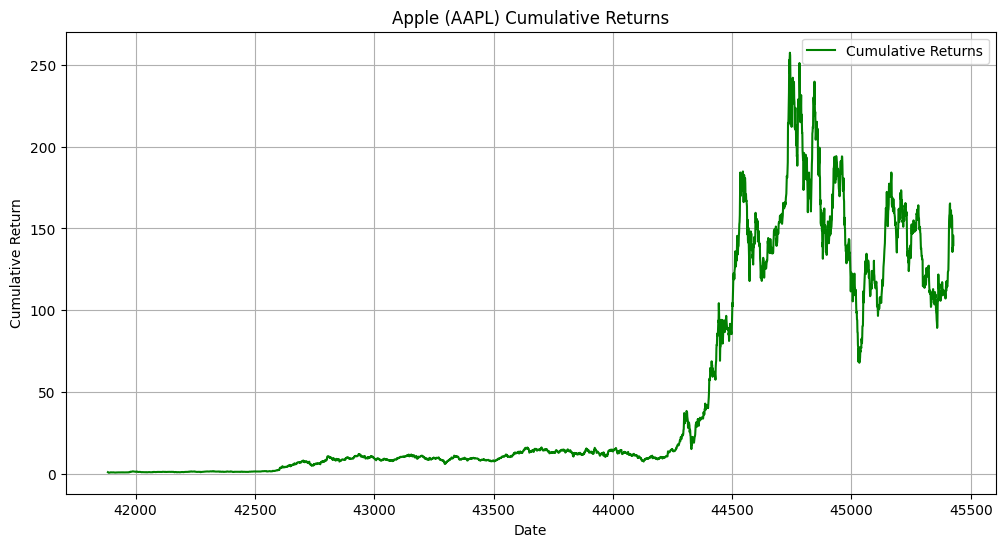

In [30]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Cumulative Returns', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Apple (AAPL) Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


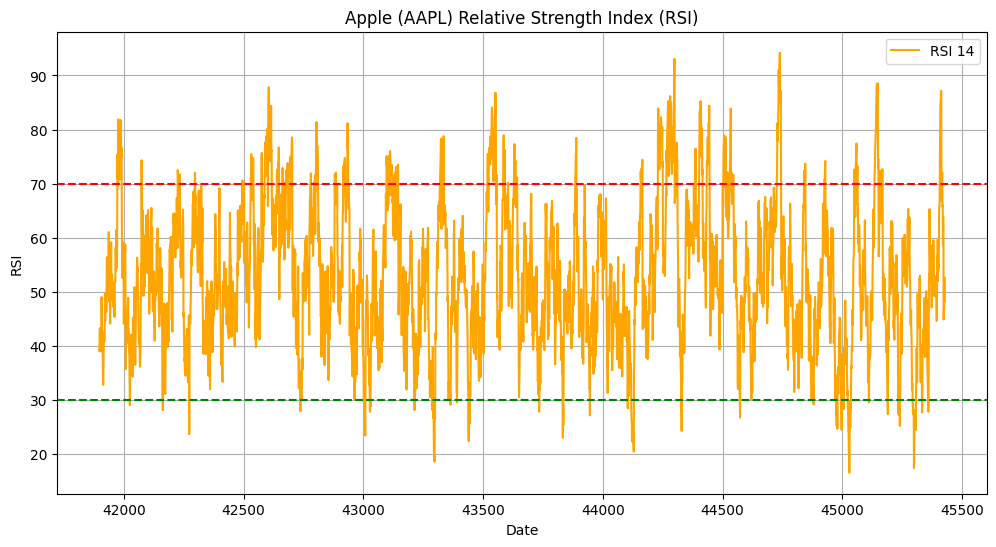

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data.index, aapl_data['RSI_14'], label='RSI 14', color='orange')
plt.axhline(70, linestyle='--', color='red')   # Overbought threshold
plt.axhline(30, linestyle='--', color='green') # Oversold threshold

plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Apple (AAPL) Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


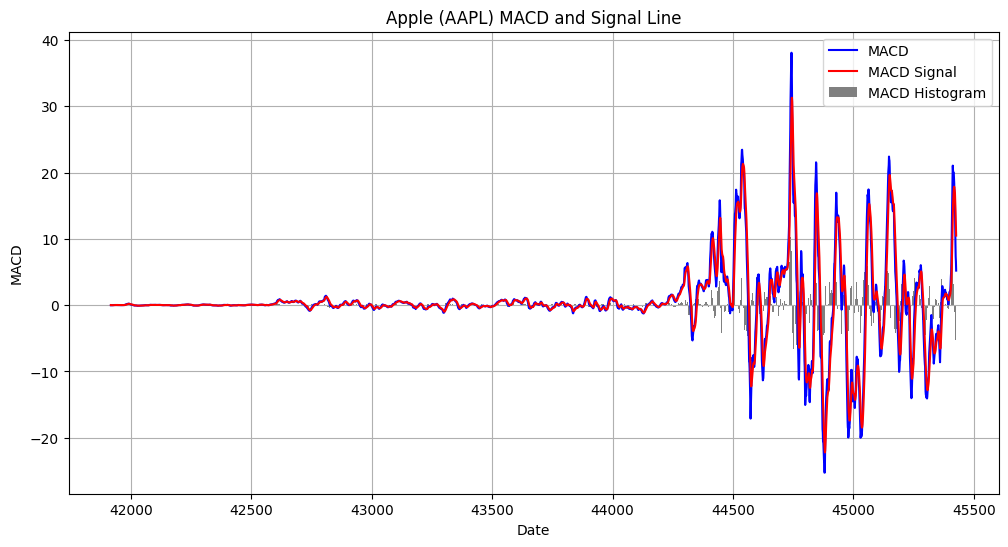

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data.index, aapl_data['MACD'], label='MACD', color='blue')
plt.plot(aapl_data.index, aapl_data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(aapl_data.index, aapl_data['MACD_hist'], label='MACD Histogram', color='gray')

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('Apple (AAPL) MACD and Signal Line')
plt.legend()
plt.grid(True)
plt.show()
